# Подготовка датасета для определения жанра музыки

1. Используемый датасет: GTZAN dataset.  
http://marsyasweb.appspot.com/download/data_sets/
2. Используемый алгоритм для экстракции фич: mfcc - более подробно в комментариях  
Библиотека: python_speech_features 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from copy import copy

import python_speech_features as psf
import sunau
import librosa as lb

In [31]:
#tmp_file_names = !dir "genres" /B /S
#curr_dir = !echo %cd%
#curr_dir = curr_dir[0]+"\\" #Чтобы удалить текущую директорию
try:
    OSTYPE = !uname
except:
    OSTYPE = ['Windows']
    
if OSTYPE == ['Linux']:
    tmp_file_names = !find ./genres -type f | sort
    file_names = list()
    for file_name in tmp_file_names:
        if not (file_name.find('.au') == -1):
            file_names.append(file_name)
            
elif OSTYPE == ['Windows']:
    tmp_file_names = !dir "genres" /B /S
    curr_dir = !echo %cd%
    curr_dir = curr_dir[0]+"\\" #Чтобы удалить текущую директорию

    file_names = list()
    for file_name in tmp_file_names:
        if not (file_name.find('.au') == -1):
            file_name = file_name.replace(curr_dir, '')
            file_names.append(file_name)

In [32]:
columns_audio_file = ['genre', 'file_name', 'samplerate', 'duration', 'audio_data'] #Информация о файле и его содержимом в pd.DataFrame

./genres/blues/blues.00000.au
genre                                                     blues
file_name                                        blues.00000.au
samplerate                                                22050
duration                                                     30
audio_data    [0.00732422, 0.0166016, 0.00762939, -0.0035095...
dtype: object


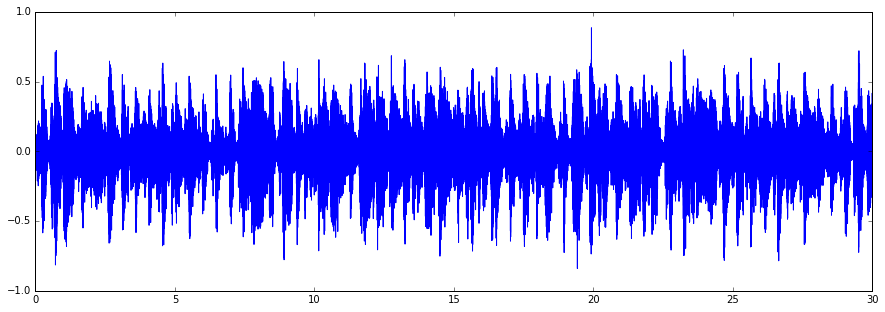

./genres/classical/classical.00000.au
genre                                                 classical
file_name                                    classical.00000.au
samplerate                                                22050
duration                                                     30
audio_data    [-0.0200806, -0.0174866, 0.00418091, 0.0086059...
dtype: object


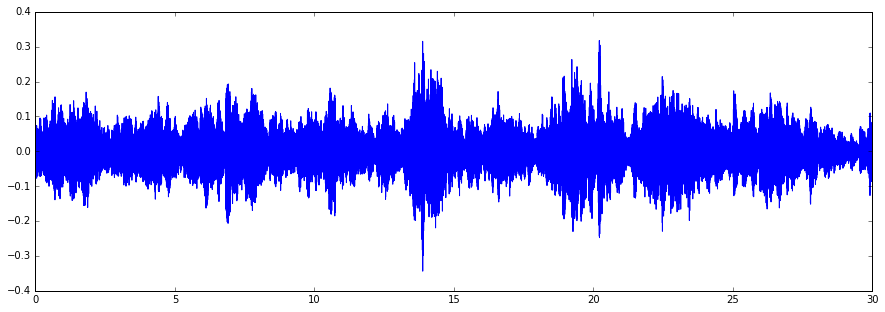

./genres/country/country.00000.au
genre                                                   country
file_name                                      country.00000.au
samplerate                                                22050
duration                                                     30
audio_data    [-0.134155, -0.194855, -0.042572, 0.0528259, -...
dtype: object


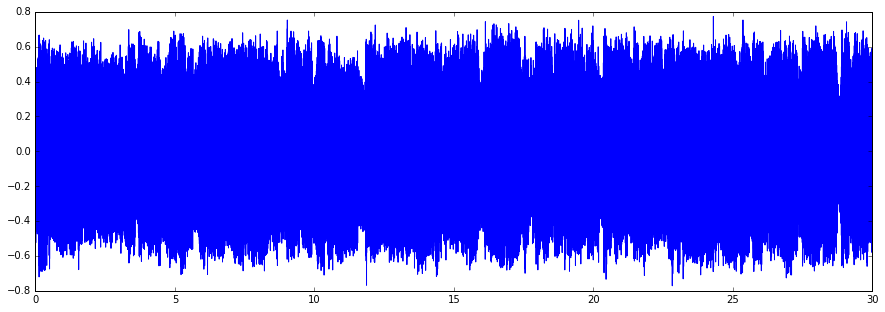

./genres/disco/disco.00000.au
genre                                                     disco
file_name                                        disco.00000.au
samplerate                                                22050
duration                                                     30
audio_data    [-0.232025, -0.231689, -0.197906, -0.163147, -...
dtype: object


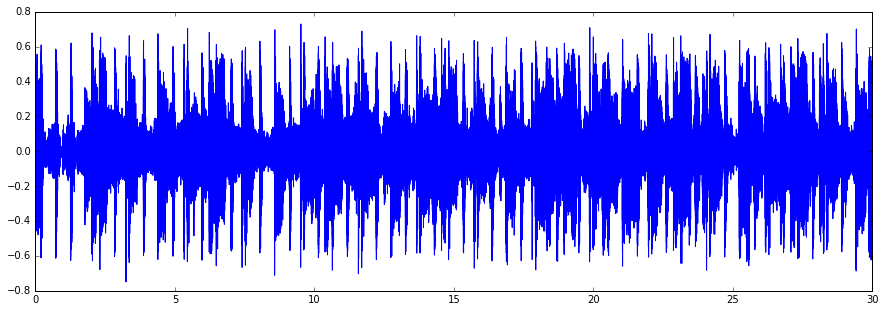

./genres/hiphop/hiphop.00000.au
genre                                                    hiphop
file_name                                       hiphop.00000.au
samplerate                                                22050
duration                                                     30
audio_data    [-0.169159, -0.021698, 0.0195618, -0.0787048, ...
dtype: object


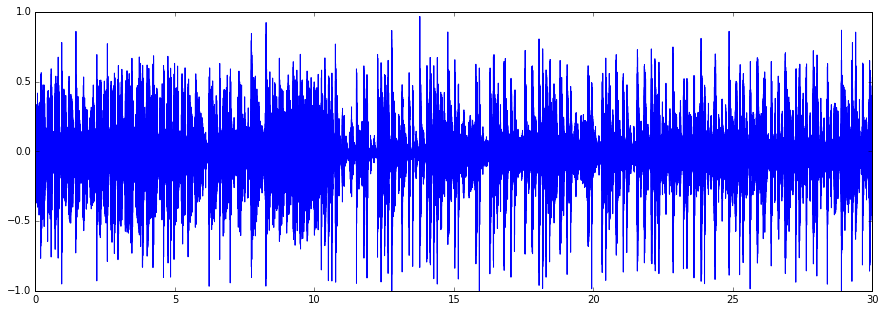

./genres/jazz/jazz.00000.au
genre                                                      jazz
file_name                                         jazz.00000.au
samplerate                                                22050
duration                                                     30
audio_data    [-0.00924683, -0.0117798, -0.0137024, -0.01324...
dtype: object


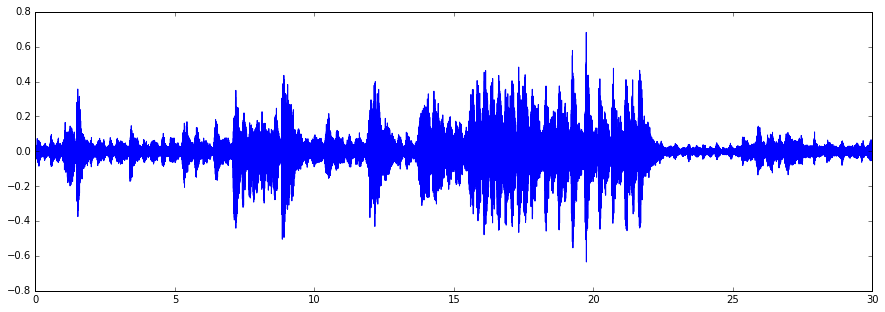

./genres/metal/metal.00000.au
genre                                                     metal
file_name                                        metal.00000.au
samplerate                                                22050
duration                                                     30
audio_data    [-0.122375, -0.0491943, 0.0444031, 0.109924, 0...
dtype: object


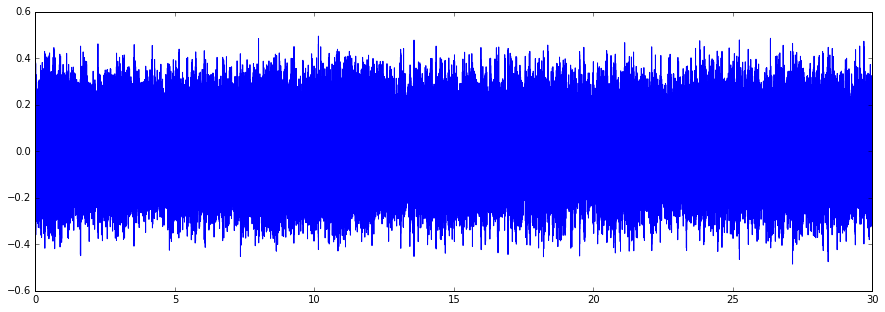

./genres/pop/pop.00000.au
genre                                                       pop
file_name                                          pop.00000.au
samplerate                                                22050
duration                                                     30
audio_data    [-0.0887146, -0.0952454, -0.102753, -0.113068,...
dtype: object


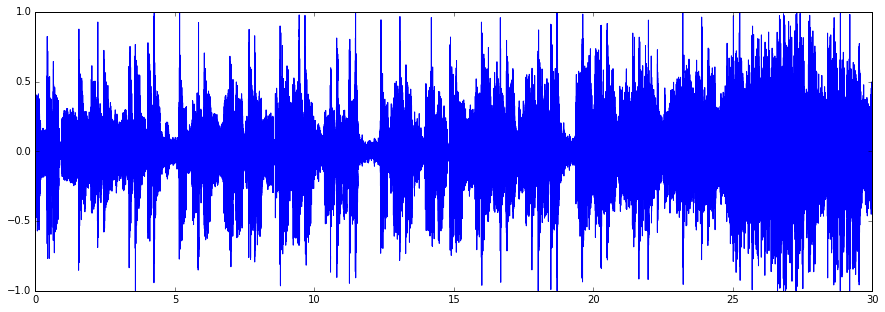

./genres/reggae/reggae.00000.au
genre                                                    reggae
file_name                                       reggae.00000.au
samplerate                                                22050
duration                                                     30
audio_data    [0.010376, 0.00775146, 0.0388794, 0.0934448, 0...
dtype: object


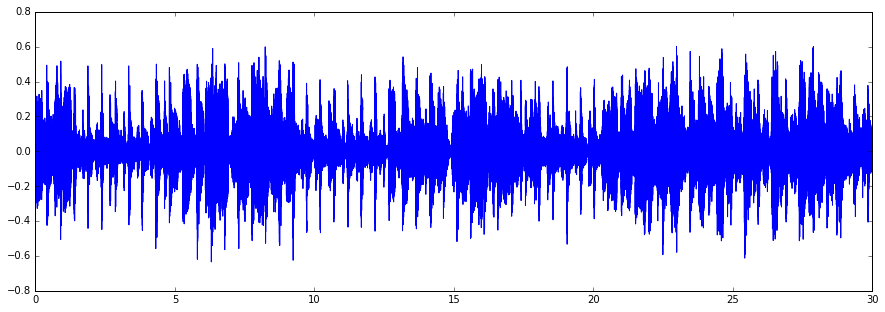

./genres/rock/rock.00000.au
genre                                                      rock
file_name                                         rock.00000.au
samplerate                                                22050
duration                                                     30
audio_data    [-0.0334473, -0.0549011, -0.0543518, -0.066619...
dtype: object


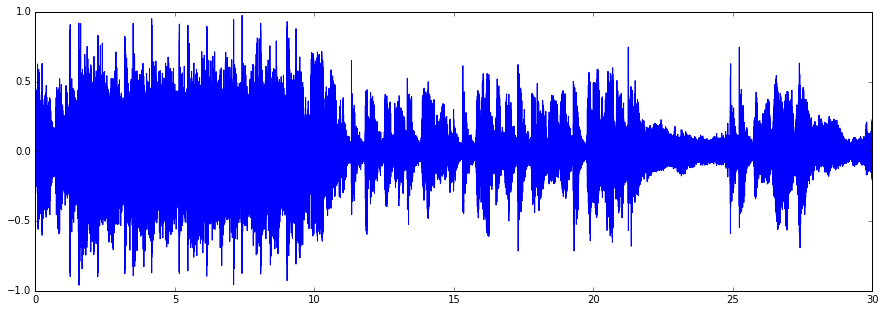

,genre,file_name,samplerate,duration,audio_data
0,blues,blues.00000.au,22050,30,"[0.00732422, 0.0166016, 0.00762939, -0.0035095..."
1,blues,blues.00001.au,22050,30,"[0.00341797, 0.00430298, 0.00137329, 0.0012817..."
2,blues,blues.00002.au,22050,30,"[0.0190125, 0.047699, 0.0294189, -0.0180054, -..."
3,blues,blues.00003.au,22050,30,"[-0.0130005, -0.0306091, -0.0360718, -0.041076..."
4,blues,blues.00004.au,22050,30,"[-0.00631714, -0.00927734, -0.0083313, -0.0084..."
5,blues,blues.00005.au,22050,30,"[-0.024292, -0.0297546, -0.00961304, 0.0009155..."
6,blues,blues.00006.au,22050,30,"[0.182281, 0.28302, 0.210205, 0.156036, 0.0929..."
7,blues,blues.00007.au,22050,30,"[0.0129089, 0.00811768, -0.00445557, -0.002136..."
8,blues,blues.00008.au,22050,30,"[0.0113831, 0.021759, 0.0100708, -0.0177002, -..."
9,blues,blues.00009.au,22050,30,"[0.0464783, 0.0639954, 0.0432739, 0.038269, 0...."


In [33]:
audio_files = pd.DataFrame(columns=columns_audio_file)
for k, file_name in enumerate(file_names):
    audio_file = pd.Series(index=columns_audio_file)
    if OSTYPE == ['Linux']:
        audio_file.genre = file_name.split('/')[2] #все разложено по папкам genres\\жанр\\файл.au
        audio_file.file_name = file_name.split('/')[3] 
    elif OSTYPE == ['Windows']:
        audio_file.genre = file_name.split('\\')[1] #все разложено по папкам genres\\жанр\\файл.au
        audio_file.file_name = file_name.split('\\')[2]
    
    audio_data_librosa, audio_file.samplerate = lb.load(file_name)
    audio_file.duration = len(audio_data_librosa)/audio_file.samplerate
    audio_file.audio_data = np.array(audio_data_librosa)
    audio_files = audio_files.append(audio_file, ignore_index=True)
    
    #визуализируем по 1 аудио в каждом жанре
    if k%100 == 0:
        print file_name
        print audio_file
        flames_count = int(audio_file.samplerate*audio_file.duration)
        #print [(float(i)/flame_rate) for i in xrange(flame_rate*30)][0:10]
        list_for_output = [[(i) for i in xrange(0, flames_count)]]
        time_axis = np.array([(float(i)/audio_file.samplerate) for i in xrange(flames_count)])
        plt.figure(figsize=(15, 5))
        plt.plot(time_axis[list_for_output], audio_data_librosa[list_for_output])
        #
        plt.show()
        
    #audio_data_sunau.close()
audio_files

In [68]:
#Массив жанров
genres = set(audio_files.genre)
genres

NameError: name 'audio_files' is not defined

In [35]:
audio_files_backup = copy(audio_files)

In [36]:
#Восстановление из бэкапа
audio_files = copy(audio_files_backup)

In [37]:
#mfcc делает преобразования с фрагментами длительностью winlen=0.025 секунды, промежуток между началами winstep=0.01
#получаем по numcep кепстральных коэффициентов на каждый фрагмент
#mfcc = psf.mfcc(audio_file.audio_data, samplerate=audio_file.samplerate, nfft=1024)
numcep=30
winlen=0.025
winstep=0.01

#Какие статистики будут вычеслены по результату mfcc (list из tuple: название+функция)
#Еще берутся статистики разностей в туториале (я так понимаю, что между фичами?)
#http://mirlab.org/jang/books/audioSignalProcessing/appNote/musicGenreClassification/html/goTutorial.html
#http://mirlab.org/jang/books/audioSignalProcessing/appNote/musicGenreClassification/mgcFeaExtract.m
statistics_index = ['name_statistic', 'func_statistic']
statistics = [pd.Series(data=['mean', lambda x: x.mean(axis=0)], index=statistics_index),
              pd.Series(data=['std', lambda x: x.std(axis=0)], index=statistics_index),
              pd.Series(data=['max', lambda x: x.max(axis=0)], index=statistics_index),
              pd.Series(data=['min', lambda x: x.min(axis=0)], index=statistics_index),
              pd.Series(data=['diff_mean', lambda x: np.diff(x, axis=1).mean(axis=0)], index=statistics_index),
              pd.Series(data=['diff_std',  lambda x: np.diff(x, axis=1).std(axis=0)], index=statistics_index)]

for statistic in statistics:
    audio_files.loc[:, statistic.name_statistic] = None

for i in xrange(audio_files.shape[0]):
    audio_file = audio_files.loc[i]
    mfcc = psf.mfcc(audio_file.audio_data, samplerate=audio_file.samplerate, numcep=numcep,
                    winlen=winlen, winstep=winstep, nfft=1024)
    for statistic in statistics:
        audio_file[statistic.name_statistic] = statistic.func_statistic(mfcc)
    audio_files.loc[i] = audio_file
    print audio_file.name, "processed!"

0 processed!
1 processed!
2 processed!
3 processed!
4 processed!
5 processed!
6 processed!
7 processed!
8 processed!
9 processed!
10 processed!
11 processed!
12 processed!
13 processed!
14 processed!
15 processed!
16 processed!
17 processed!
18 processed!
19 processed!
20 processed!
21 processed!
22 processed!
23 processed!
24 processed!
25 processed!
26 processed!
27 processed!
28 processed!
29 processed!
30 processed!
31 processed!
32 processed!
33 processed!
34 processed!
35 processed!
36 processed!
37 processed!
38 processed!
39 processed!
40 processed!
41 processed!
42 processed!
43 processed!
44 processed!
45 processed!
46 processed!
47 processed!
48 processed!
49 processed!
50 processed!
51 processed!
52 processed!
53 processed!
54 processed!
55 processed!
56 processed!
57 processed!
58 processed!
59 processed!
60 processed!
61 processed!
62 processed!
63 processed!
64 processed!
65 processed!
66 processed!
67 processed!
68 processed!
69 processed!
70 processed!
71 processed!
72

554 processed!
555 processed!
556 processed!
557 processed!
558 processed!
559 processed!
560 processed!
561 processed!
562 processed!
563 processed!
564 processed!
565 processed!
566 processed!
567 processed!
568 processed!
569 processed!
570 processed!
571 processed!
572 processed!
573 processed!
574 processed!
575 processed!
576 processed!
577 processed!
578 processed!
579 processed!
580 processed!
581 processed!
582 processed!
583 processed!
584 processed!
585 processed!
586 processed!
587 processed!
588 processed!
589 processed!
590 processed!
591 processed!
592 processed!
593 processed!
594 processed!
595 processed!
596 processed!
597 processed!
598 processed!
599 processed!
600 processed!
601 processed!
602 processed!
603 processed!
604 processed!
605 processed!
606 processed!
607 processed!
608 processed!
609 processed!
610 processed!
611 processed!
612 processed!
613 processed!
614 processed!
615 processed!
616 processed!
617 processed!
618 processed!
619 processed!
620 proces

In [38]:
audio_files

,genre,file_name,samplerate,duration,audio_data,mean,std,max,min,diff_mean,diff_std
0,blues,blues.00000.au,22050,30,"[0.00732422, 0.0166016, 0.00762939, -0.0035095...","[-1.50538263746, -1.66745918483, -15.212207027...","[1.1420274287, 6.01268043275, 8.70403616946, 9...","[1.01400399487, 13.7094256483, 11.6870976431, ...","[-4.85854815358, -26.5761592554, -42.667577959...","[-0.16207654737, -13.5447478422, 19.4441901528...","[6.11997806054, 12.510463513, 11.4299537918, 1..."
1,blues,blues.00001.au,22050,30,"[0.00341797, 0.00430298, 0.00137329, 0.0012817...","[-3.2734162588, 0.852053788955, -2.89078735548...","[2.12635579662, 8.16188349752, 12.7040538122, ...","[1.2342157902, 24.1149485436, 25.1999360127, 3...","[-9.67297875963, -32.8113314188, -51.116216528...","[4.12547004775, -3.74284114444, 7.23281575425,...","[9.13983631542, 16.9006354068, 17.1479362716, ..."
2,blues,blues.00002.au,22050,30,"[0.0190125, 0.047699, 0.0294189, -0.0180054, -...","[-0.943213842767, 3.49022076494, -18.450147730...","[1.30325968552, 7.31023389807, 9.75454936495, ...","[1.94451093316, 30.9238103109, 17.5614565768, ...","[-7.14970219972, -42.6749504183, -47.427812087...","[4.4334346077, -21.9403684957, 18.1063287079, ...","[7.93639193131, 12.6700697746, 11.111014651, 1..."
3,blues,blues.00003.au,22050,30,"[-0.0130005, -0.0306091, -0.0360718, -0.041076...","[-3.3917023062, 9.25209883646, -4.38120258743,...","[1.56811584408, 7.69374056833, 8.6493962922, 8...","[0.505261745911, 35.5988819769, 17.7260613552,...","[-7.70663010614, -21.7839656332, -39.608138592...","[12.6438011427, -13.6333014239, 9.33408447486,...","[8.32276957183, 12.4804653905, 10.3850064163, ..."
4,blues,blues.00004.au,22050,30,"[-0.00631714, -0.00927734, -0.0083313, -0.0084...","[-1.96142935972, 0.937013810729, -23.265174625...","[1.88318813877, 9.51916116772, 8.22781382334, ...","[2.68423868996, 22.2495570042, 1.29087329427, ...","[-7.53537100034, -41.6089840954, -48.909222282...","[2.89844317045, -24.2021884359, 21.9431066247,...","[10.8023498645, 11.2244901379, 13.2697839771, ..."
5,blues,blues.00005.au,22050,30,"[-0.024292, -0.0297546, -0.00961304, 0.0009155...","[-2.1353887081, 2.49841695573, -15.1738960346,...","[2.25315092185, 14.8415426742, 9.90401463006, ...","[3.47138861515, 28.1725934769, 19.8527737992, ...","[-9.04380414385, -49.3708558215, -38.340123755...","[4.63380566383, -17.6723129903, 19.6138315197,...","[16.3127002924, 18.1899488724, 15.2722035732, ..."
6,blues,blues.00006.au,22050,30,"[0.182281, 0.28302, 0.210205, 0.156036, 0.0929...","[-2.11225678539, 11.6528962963, -23.6024082256...","[2.72318954794, 13.4069233395, 13.2523132004, ...","[2.61813791792, 36.9473332375, 13.8564100532, ...","[-9.94682459213, -38.5199634061, -57.143889716...","[13.7651530817, -35.255304522, 29.9496983857, ...","[14.7682259818, 18.597511245, 16.4567679243, 2..."
7,blues,blues.00007.au,22050,30,"[0.0129089, 0.00811768, -0.00445557, -0.002136...","[-2.24743499819, 7.78380454394, -17.7683597357...","[2.00717232234, 11.6526596854, 9.51996303394, ...","[2.9919151362, 35.6508943082, 13.8078429177, 4...","[-8.64027198091, -43.2282519081, -40.721016979...","[10.0312395421, -25.5521642796, 28.2486989312,...","[12.6603108349, 14.9105872059, 13.4838956844, ..."
8,blues,blues.00008.au,22050,30,"[0.0113831, 0.021759, 0.0100708, -0.0177002, -...","[-1.55594313838, -1.90990755155, -11.389294561...","[1.0904246055, 6.69805250315, 9.92288304673, 1...","[0.957909079264, 14.3829034361, 9.51101862893,...","[-4.98870974492, -31.2230662209, -47.387254000...","[-0.353964413171, -9.47938701032, 19.984126895...","[6.94523319073, 15.0078884927, 10.8561602216, ..."
9,blues,blues.00009.au,22050,30,"[0.0464783, 0.0639954, 0.0432739, 0.038269, 0....","[-3.07371571645, -0.331702137168, -12.55682663...","[2.34682700349, 7.7244200406, 11.5090830417, 1...","[2.44348113598, 20.0828478697, 12.9607109129, ...","[-7.20556380675, -46.2955542684, -43.111739332...","[2.74201357929, -12.2251244985, 19.5017460752,...","[8.1724

In [39]:
#Посмотрим на профили статистик для разных жанров
#Для этого посмотрим на фильмы разных жанров с определенным номером
def StatisticsForFilmNumber(num=0):
    for statistic in statistics:
        print statistic.name_statistic
        list_names=list()
        for i in xrange(len(genres)):
            plt.plot(audio_files.loc[i*100+num][statistic.name_statistic])
            list_names.append(audio_files.loc[i*100+num]['genre'])
        plt.legend(list_names)
        plt.show()

mean


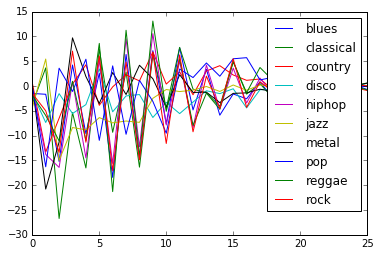

std


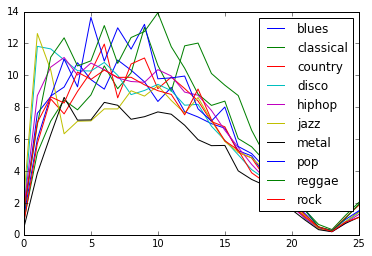

max


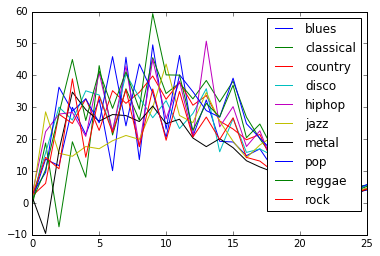

min


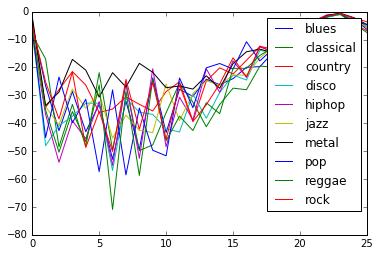

diff_mean


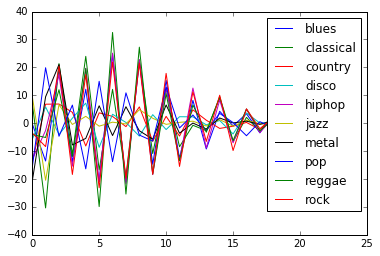

diff_std


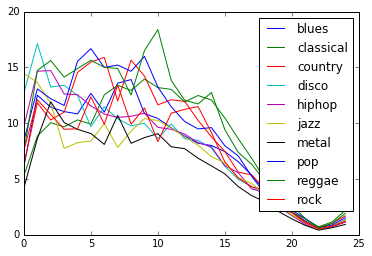

In [40]:
StatisticsForFilmNumber(0)

mean


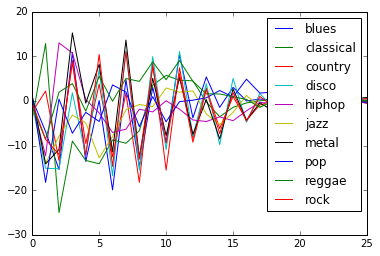

std


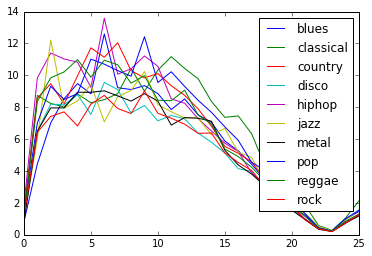

max


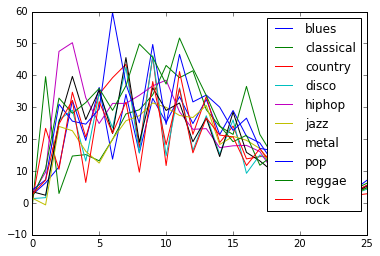

min


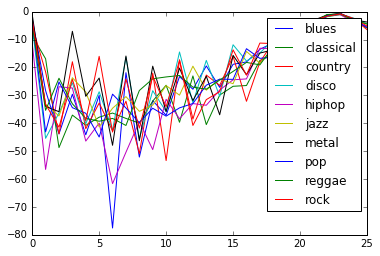

diff_mean


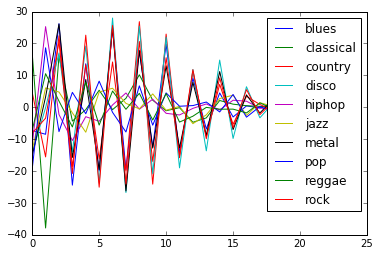

diff_std


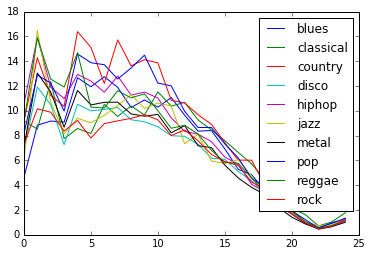

In [41]:
StatisticsForFilmNumber(73)

In [43]:
#Сохраним датасет
audio_files_save = audio_files.drop(axis=1, labels='audio_data')
audio_files_save.to_csv('dataset.csv')

In [2]:
#Проверим загружаемость
audio_files_load = pd.read_csv('dataset.csv',index_col=0, sep=",")
audio_files_load

,genre,file_name,samplerate,duration,mean,std,max,min,diff_mean,diff_std
0,blues,blues.00000.au,22050,30,[ -1.50538264 -1.66745918 -15.21220703 4.23...,[ 1.14202743 6.01268043 8.70403617 9.26...,[ 1.01400399 13.70942565 11.68709764 29.98...,[ -4.85854815 -26.57615926 -42.66757796 -28.61...,[ -1.62076547e-01 -1.35447478e+01 1.9444190...,[ 6.11997806 12.51046351 11.42995379 11.04...
1,blues,blues.00001.au,22050,30,[ -3.27341626e+00 8.52053789e-01 -2.8907873...,[ 2.1263558 8.1618835 12.70405381 12.34...,[ 1.23421579 24.11494854 25.19993601 36.74...,[ -9.67297876 -32.81133142 -51.11621653 -34.84...,[ 4.12547005 -3.74284114 7.23281575 -11.75...,[ 9.13983632 16.90063541 17.14793627 13.05...
2,blues,blues.00002.au,22050,30,[ -9.43213843e-01 3.49022076e+00 -1.8450147...,[ 1.30325969 7.3102339 9.75454936 9.58...,[ 1.94451093 30.92381031 17.56145658 42.21...,[ -7.1497022 -42.67495042 -47.42781209 -27.95...,[ 4.43343461e+00 -2.19403685e+01 1.8106328...,[ 7.93639193 12.67006977 11.11101465 14.64...
3,blues,blues.00003.au,22050,30,[ -3.39170231 9.25209884 -4.38120259 4.95...,[ 1.56811584 7.69374057 8.64939629 8.37...,[ 0.50526175 35.59888198 17.72606136 30.46...,[ -7.70663011 -21.78396563 -39.60813859 -23.36...,[ 12.64380114 -13.63330142 9.33408447 -13.09...,[ 8.32276957 12.48046539 10.38500642 11.23...
4,blues,blues.00004.au,22050,30,[ -1.96142936 0.93701381 -23.26517463 -1.32...,[ 1.88318814 9.51916117 8.22781382 9.36...,[ 2.68423869 22.249557 1.29087329 38.57...,[ -7.535371 -41.6089841 -48.90922228 -25.54...,[ 2.89844317 -24.20218844 21.94310662 -28.03...,[ 10.80234986 11.22449014 13.26978398 14.48...
5,blues,blues.00005.au,22050,30,[ -2.13538871e+00 2.49841696e+00 -1.5173896...,[ 2.25315092 14.84154267 9.90401463 13.59...,[ 3.47138862 28.17259348 19.8527738 54.43...,[ -9.04380414 -49.37085582 -38.34012376 -27.59...,[ 4.63380566e+00 -1.76723130e+01 1.9613831...,[ 16.31270029 18.18994887 15.27220357 15.75...
6,blues,blues.00006.au,22050,30,[ -2.11225679e+00 1.16528963e+01 -2.3602408...,[ 2.72318955 13.40692334 13.2523132 12.91...,[ 2.61813792 36.94733324 13.85641005 52.86...,[ -9.94682459 -38.51996341 -57.14388972 -25.54...,[ 1.37651531e+01 -3.52553045e+01 2.9949698...,[ 14.76822598 18.59751124 16.45676792 26.70...
7,blues,blues.00007.au,22050,30,[ -2.247435 7.78380454 -17.76835974 10.48...,[ 2.00717232 11.65265969 9.51996303 11.90...,[ 2.99191514 35.65089431 13.80784292 48.93...,[ -8.64027198 -43.22825191 -40.72101698 -19.46...,[ 10.03123954 -25.55216428 28.24869893 -16.54...,[ 12.66031083 14.91058721 13.48389568 18.47...
8,blues,blues.00008.au,22050,30,[ -1.55594314 -1.90990755 -11.38929456 8.59...,[ 1.09042461 6.6980525 9.92288305 11.06...,[ 0.95790908 14.38290344 9.51101863 50.40...,[ -4.98870974 -31.22306622 -47.387254 -19.01...,[ -0.35396441 -9.47938701 19.9841269 -15.15...,[ 6.94523319 15.00788849 10.85616022 15.11...
9,blues,blues.00009.au,22050,30,[ -3.07371572e+00 -3.31702137e-01 -1.2556826...,[ 2.346827 7.72442004 11.50908304 11.84...,[ 2.44348114 20.08284787 12.96071091 58.16...,[ -7.20556381 -46.29555427 -43.11173933 -20.41...,[ 2.74201358 -12.2251245 19.50174608 -32.45...,[ 8.17247535 15.69222587 16.59228327 17.83...


In [3]:
from sklearn.preprocessing import LabelEncoder
def prepare_data(data):
    X = data.iloc[:,[4,5,6,7]].values
    y = data.iloc[:,0]
    res = list()
    for x in X:
        res_prep = list()
        for element in x:
            element = element.replace('[', '').replace(']', '').replace('\n', '')
            try:
                res_prep = np.concatenate((res_prep, np.fromstring(element, dtype='float', sep=' ')))
            except:
                res_prep = np.fromstring(element, dtype='float', sep=' ')
        res.append(res_prep)
    X = np.array(res)
    
    le = LabelEncoder()
    le.fit(y)
    y = le.transform(y)
    return X, y

In [4]:
X, y = prepare_data(audio_files_load)

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import cross_val_score

In [22]:
def select_model(x, y):

    best_accuracy = 0
    best_model = None
    
    model = SVC()
    param_grid = [{'C':[1, 10, 100],
                  'kernel':['linear']},
                  {'C':[1, 10, 100],
                  'kernel':['poly'],
                  'degree':[2,3]},
                  {'C':[1, 10, 100],
                  'kernel':['rbf'],
                  'degree':[2,3],
                  'gamma':['auto']}]

    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=10, verbose=0)
    grid.fit(x,y)
    
    print cross_val_score(model, x, y)
    accuracy = np.mean(cross_val_score(model, x, y))

    best_model = model
    best_accuracy = accuracy
    
    best_model.fit(x, y)
    print "Best model %s, with accuracy %f" % (best_model, best_accuracy)
    return best_model

In [23]:
model = select_model(X, y)

[ 0.10588235  0.14848485  0.13636364]
Best model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.130244


In [24]:
model.fit(X, y)
y_hat = model.predict(X)

In [26]:
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3,

** Прикинем предсказания **

In [20]:
audio_files[audio_files.genre == 'rock']['mean'].values[0]

NameError: name 'audio_files' is not defined

mean


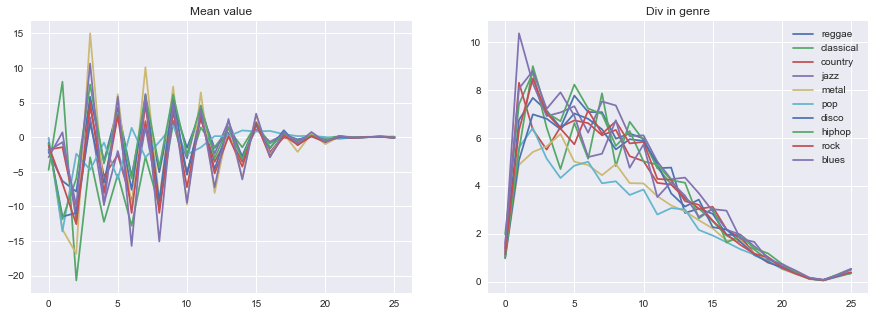

std


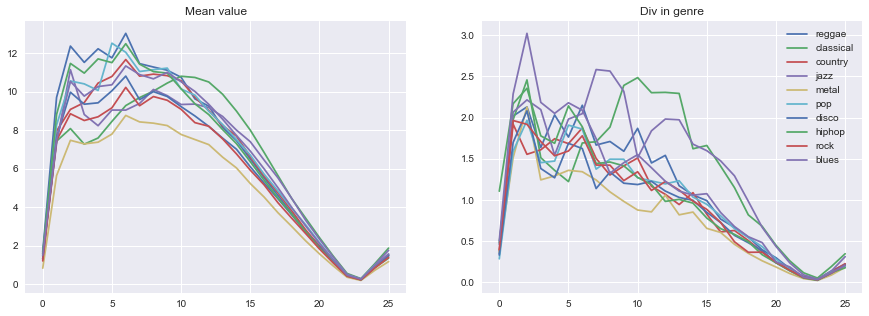

max


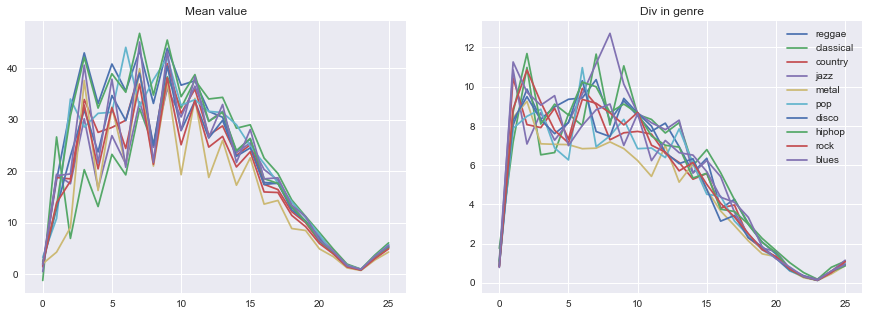

min


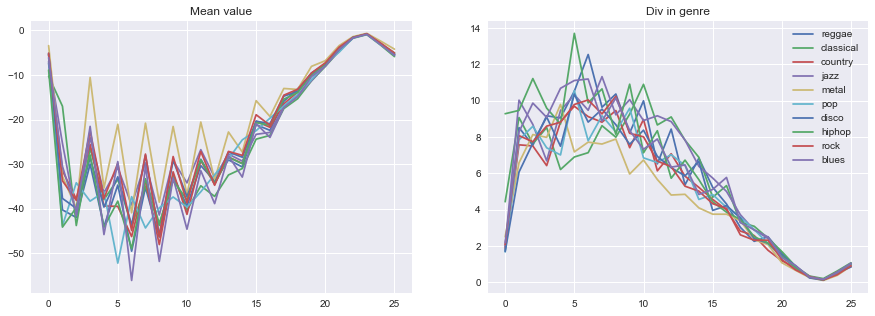

diff_mean


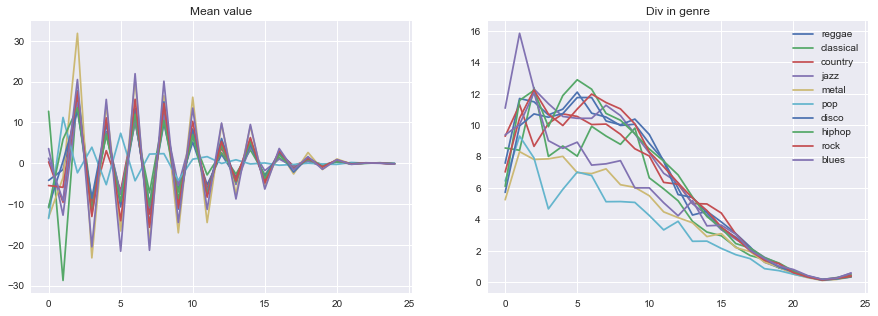

diff_std


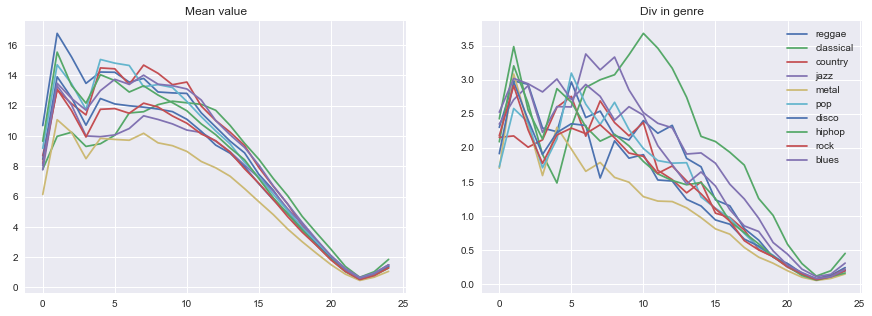

In [243]:
#Усредним каждую статистику по жанрам
for statistic in statistics:
    figure, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].set_title('Mean value')
    axes[1].set_title('Div in genre')
    for genre in genres:
        arr = np.vstack(audio_files[audio_files.genre == genre][statistic.name_statistic].values)
        axes[0].plot(arr.mean(axis=0))
        axes[1].plot(arr.std(axis=0))
        
    print statistic.name_statistic
    plt.legend(genres)
    plt.show()